# Data Wrangling

<a id='gathering'></a>
## 1-Gathering


<a id='twitter-archive-enhanced.csv'></a>
### Loading the `twitter-archive-enhanced.csv` file

In [2]:
import pandas as pd


df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
867,761976711479193600,NaN,NaN,2016-08-06 17:26:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shelby. She finds stuff to put on her ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761976711...,12,10,Shelby,None,None,None,None
1421,698195409219559425,NaN,NaN,2016-02-12 17:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Beau &amp; Wilbur. Wilbur stole Beau's be...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
1505,691793053716221953,NaN,NaN,2016-01-26 01:21:31 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",We usually don't rate penguins but this one is...,NaN,NaN,NaN,https://vine.co/v/OTTVAKw6YlW,10,10,None,None,None,None,None


### Download&Save then load `image-predictions.tsv` file

In [3]:
import requests


url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('image-predictions.tsv', 'wb') as f:
    f.write(r.content)

df_image_predictions = pd.read_csv('image-predictions.tsv', sep="\t", header=0)
df_image_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### Loading API's credentials 

In [233]:
creds = {}
with open('credentials.txt', 'r') as f:
    for line in f:
        creds[line.split(':')[0]] = line.split(':')[1].strip()

### Authenticate & Create API's Instance

In [234]:
import tweepy

        
api_key = creds['api_key']
api_secret = creds['api_secret']
access_token = creds['access_token']
access_secret = creds['access_secret']

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

### Pull 'favorite counts' & 'retweet counts' & 'source' of the tweet's ID then save it to a list of dictionaries to load it later to a DataFrame

In [141]:
import time


i = 0
status = []
errors = []
start_time = time.time()
for tweet_id in df_twitter_archive.tweet_id:
    epoch_start_time = time.time()
    i += 1
    try:
        curr_tweet_status = api.get_status(tweet_id)
        curr_favorite_count = curr_tweet_status.favorite_count
        curr_retweet_count = curr_tweet_status.retweet_count
        curr_source = curr_tweet_status.source
        status.append({'tweet_id' : tweet_id, 
                       'favorite_count' : curr_favorite_count,
                       'retweet_count' : curr_retweet_count,
                       'source' : curr_source})
    except:
        errors.append(tweet_id)
    epoch_end_time = time.time()
    if i % 100 == 0:
        print('{}/{} tweets has finish and it took {:.2f} second, total time of {:.1f} minutes has passed'
              .format(i, len(df_twitter_archive.tweet_id), epoch_end_time-epoch_start_time, (epoch_end_time-start_time)/60))


100/2356 tweets has finish and it took 3.17 second, total time of 1.8 minutes has passed
200/2356 tweets has finish and it took 0.68 second, total time of 3.3 minutes has passed
300/2356 tweets has finish and it took 0.85 second, total time of 5.7 minutes has passed
400/2356 tweets has finish and it took 0.85 second, total time of 7.0 minutes has passed
500/2356 tweets has finish and it took 0.59 second, total time of 8.9 minutes has passed
600/2356 tweets has finish and it took 0.81 second, total time of 10.4 minutes has passed
700/2356 tweets has finish and it took 0.58 second, total time of 12.8 minutes has passed
800/2356 tweets has finish and it took 0.54 second, total time of 14.4 minutes has passed
900/2356 tweets has finish and it took 1.55 second, total time of 15.9 minutes has passed
1000/2356 tweets has finish and it took 21.03 second, total time of 19.4 minutes has passed
1100/2356 tweets has finish and it took 1.15 second, total time of 22.9 minutes has passed
1200/2356 tw

### Save 'favorite counts' & 'retweet counts' of the tweet's ID to a json file

In [ ]:
import json


with open('tweet_json.txt', 'w') as f:
    json.dump(status, f)

### Load `tweet_json.txt` file to a DataFrame

In [4]:
df_tweet_status = pd.read_json('tweet_json.txt', orient='records')
df_tweet_status.head(3)

,tweet_id,favorite_count,retweet_count,source
0,892420643555336193,34994,7343,Twitter for iPhone
1,892177421306343426,30298,5478,Twitter for iPhone
2,891815181378084864,22786,3623,Twitter for iPhone


## 2-Assessing

### Quality

#### `df_twitter_archive` table:
- `in_reply_to_status_id` column consist of random numbers
- `in_reply_to_user_id` column consist of IDs that dosn't exist
- `timestamp`column is string not datetime
- `retweeted_status_id` column also consist random numbers
- `retweeted_status_user_id` column also consist of IDs that dosn't exist
- `retweeted_status_timestamp` column consists of misxed datatypes (str&float) not datetime
- `rating_numerator` & `rating_denominator` colmuns have invalid values
- `names` column have invalid dog names
- `tweet_id ` is int
- some value is `None`
- columns have undescrpitive names
- `source` column contain only 4 values
- mulitpile dog names in the same row

#### `image_predictions` table:
- `p1` & `p2` & `p3` have non-dog-name values

### Tidness
- `doggo` & `floofer` & `pupper` & `puppo` in 4 different columns
- all DataFrames should be in one DataFrame 

#### Assessing `df_twitter_archive`

In [281]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [205]:
df_twitter_archive_clean.describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count
count,2175.000000,2175.000000,2148.000000,2148.000000
mean,13.177140,10.492874,7896.744879,2351.482775
std,47.705088,7.019084,11622.430594,4180.093675
min,0.000000,0.000000,49.000000,1.000000
25%,10.000000,10.000000,1690.750000,506.750000
50%,11.000000,10.000000,3557.000000,1120.000000
75%,12.000000,10.000000,9781.750000,2683.750000
max,1776.000000,170.000000,150385.000000,74203.000000


In [282]:
df_twitter_archive.duplicated().sum()

0

In [283]:
df_twitter_archive.tweet_id.value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
                     ..
715360349751484417    1
666817836334096384    1
794926597468000259    1
673705679337693185    1
700151421916807169    1
Name: tweet_id, Length: 2356, dtype: int64

#### no duplicates of IDs

In [284]:
df_twitter_archive.in_reply_to_status_id.iloc[30]

8.862663570751283e+17

In [285]:
df_twitter_archive.in_reply_to_user_id.iloc[30]

2281181600.0

In [5]:
df_twitter_archive.retweeted_status_id.iloc[19]

8.874739571039519e+17

In [287]:
df_twitter_archive.retweeted_status_user_id.iloc[19]

4196983835.0

#### incorrect IDs

In [288]:
type(df_twitter_archive.timestamp.iloc[0]), df_twitter_archive.timestamp.isnull().sum()

(str, 0)

In [289]:
type(df_twitter_archive.retweeted_status_timestamp.iloc[1]), type(df_twitter_archive.retweeted_status_timestamp.iloc[19])

(float, str)

#### incorrect datetime type

In [290]:
df_twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### `source` have only 4 values

In [291]:
df_twitter_archive.text.iloc[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

#### `text` column is correct 

In [292]:
df_twitter_archive.expanded_urls.iloc[0]

'https://twitter.com/dog_rates/status/892420643555336193/photo/1'

#### urls is correct

In [293]:
df_twitter_archive.rating_numerator[df_twitter_archive.rating_numerator > 20]

188      420
189      666
290      182
313      960
340       75
433       84
516       24
695       75
763       27
902      165
979     1776
1120     204
1202      50
1228      99
1254      80
1274      45
1351      60
1433      44
1634     143
1635     121
1712      26
1779     144
1843      88
2074     420
Name: rating_numerator, dtype: int64

#### there is big numerators

In [294]:
df_twitter_archive.rating_denominator[df_twitter_archive.rating_denominator != 10]

313       0
342      15
433      70
516       7
784      11
902     150
1068     11
1120    170
1165     20
1202     50
1228     90
1254     80
1274     50
1351     50
1433     40
1598     20
1634    130
1635    110
1662     11
1663     16
1779    120
1843     80
2335      2
Name: rating_denominator, dtype: int64

#### there is denominator bigger than 10

In [295]:
pd.set_option('display.max_colwidth', None)
df_rating = pd.concat([df_twitter_archive.rating_numerator[df_twitter_archive.rating_numerator > 20], df_twitter_archive.rating_denominator[df_twitter_archive.rating_denominator != 10]], axis=1)
df_rating = pd.merge(df_rating, df_twitter_archive.text[df_rating.index],left_index=True, right_index=True)
df_rating

,rating_numerator,rating_denominator,text
188,420.0,NaN,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
189,666.0,NaN,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10"
290,182.0,NaN,@markhoppus 182/10
313,960.0,0.0,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"
340,75.0,NaN,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…"
342,NaN,15.0,@docmisterio account started on 11/15/15
433,84.0,70.0,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516,24.0,7.0,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
695,75.0,NaN,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"
763,27.0,NaN,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq


#### visual assessment for the incorrect rating by combining `rating_numerator` & `rating_denominator` & `text` in on place

In [296]:
df_twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
           ... 
Gabby         1
Zoe           1
Bradlay       1
Jessifer      1
Lulu          1
Name: name, Length: 957, dtype: int64

#### there is wrong names

In [297]:
df_twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [298]:
df_twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [299]:
df_twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [300]:
df_twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

#### Assessing `image_predictions`

In [301]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [302]:
df_image_predictions.duplicated().sum()

0

#### no duplicates

In [303]:
df_image_predictions.iloc[2071]

tweet_id                                 891689557279858688
jpg_url     https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
img_num                                                   1
p1                                              paper_towel
p1_conf                                            0.170278
p1_dog                                                False
p2                                       Labrador_retriever
p2_conf                                            0.168086
p2_dog                                                 True
p3                                                  spatula
p3_conf                                           0.0408359
p3_dog                                                False
Name: 2071, dtype: object

#### `p1` didin't get correct prediction

In [304]:
df_image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [305]:
df_tweet_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2309 entries, 0 to 2308
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2309 non-null   int64 
 1   favorite_count  2309 non-null   int64 
 2   retweet_count   2309 non-null   int64 
 3   source          2309 non-null   object
dtypes: int64(3), object(1)
memory usage: 72.3+ KB


In [306]:
df_tweet_status.duplicated().sum()

0

#### no duplicates

In [307]:
mask = df_twitter_archive.name.str.contains('^[a-z]', regex = True)
df_twitter_archive[mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

#### invalid dog names

### 3-Cleaning

- drop `in_reply_to_status_id` colum
- drop `in_reply_to_user_id` colum
- convert `timestamp` column to datetime
- drop `retweeted_status_id` colum
- drop `retweeted_status_user_id` colum
- convert `retweeted_status_timestamp` column to datetime
- repull `source` values and reconstruct the column (already done)
- `p1_conf` alwayas has the higher conf
- drop images the dosn't contain dogs (i.e. `p1_dog` == False)
- drop `p1_conf` & `p1_dog` after confirming on `p1`
- fix `source` column
- megre all DataFrame into one DataFrame

#### making a copy of the original Data

In [39]:
df_twitter_archive_clean = df_twitter_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_tweet_status_clean = df_tweet_status.copy()

#### Difine
#### removing rows that have non-empty retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp

In [40]:
df_twitter_archive_clean.drop(df_twitter_archive_clean[df_twitter_archive_clean.retweeted_status_id.notnull()].index, inplace=True)
df_twitter_archive_clean.drop(df_twitter_archive_clean[df_twitter_archive_clean.retweeted_status_user_id.notnull()].index, inplace=True)
df_twitter_archive_clean.drop(df_twitter_archive_clean[df_twitter_archive_clean.retweeted_status_timestamp.notnull()].index, inplace=True)


#### Test

In [41]:
df_twitter_archive_clean.retweeted_status_id.notnull().sum(), df_twitter_archive_clean.retweeted_status_id.notnull().sum(), df_twitter_archive_clean.retweeted_status_timestamp.notnull().sum()

(0, 0, 0)

#### Difine
##### drop '`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` columns

In [42]:
df_twitter_archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id',
                                       'retweeted_status_id', 'retweeted_status_user_id'], inplace=True)


#### Test

In [43]:
df_twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### Difine
#### covert `timestamp` & `retweeted_status_timestamp` to datetime

In [44]:
df_twitter_archive_clean.timestamp = pd.to_datetime(df_twitter_archive_clean.timestamp)
df_twitter_archive_clean.retweeted_status_timestamp = pd.to_datetime(df_twitter_archive_clean.retweeted_status_timestamp)

#### Test

In [45]:
df_twitter_archive_clean.timestamp.iloc[0]

Timestamp('2017-08-01 16:23:56+0000', tz='UTC')

In [46]:
df_twitter_archive_clean.retweeted_status_timestamp.iloc[19]

NaT

#### Difine
##### some tweets has multiple rating or incorrect rating

In [ ]:
sample = api.get_status(835246439529840640)
import re
re.findall('\d+/\d+', sample.text), sample.text

In [49]:
df_extracted_rating= df_twitter_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
df_extracted_rating.rename(columns={0:'rating_numerator',1:'rating_denominator'}, inplace=True)
df_extracted_rating.rating_numerator = df_extracted_rating.rating_numerator.astype(float)
df_extracted_rating.rating_denominator = df_extracted_rating.rating_denominator.astype(int)
df_twitter_archive_clean.rating_numerator = df_extracted_rating.rating_numerator
df_twitter_archive_clean.rating_denominator = df_extracted_rating.rating_denominator

#### Test

In [50]:
df_twitter_archive_clean.rating_denominator.iloc[188]

10

#### Difine
#### combine the 4 columns for the dog names into one column and fix mulitple names in the same row and replace `none` with empty srting

In [51]:
df_twitter_archive_clean.doggo.replace('None', '', inplace=True)
df_twitter_archive_clean.floofer.replace('None', '', inplace=True)
df_twitter_archive_clean.pupper.replace('None', '', inplace=True)
df_twitter_archive_clean.puppo.replace('None', '', inplace=True)
df_twitter_archive_clean['stage'] = df_twitter_archive_clean.doggo + df_twitter_archive_clean.floofer + df_twitter_archive_clean.pupper + df_twitter_archive_clean.puppo
df_twitter_archive_clean.loc[df_twitter_archive_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
df_twitter_archive_clean.loc[df_twitter_archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
df_twitter_archive_clean.loc[df_twitter_archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

#### Test

In [52]:
df_twitter_archive_clean.stage.value_counts()

                 1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: stage, dtype: int64

#### Difine
#### drop 'doggo', 'floofer', 'pupper', 'puppo' columns

In [53]:
df_twitter_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [54]:
df_twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'stage'],
      dtype='object')

#### Difine
#### fix incorrect dog names

In [55]:
import numpy as np


mask = df_twitter_archive_clean.name.str.contains('^[a-z]', regex = True)
df_twitter_archive_clean.name[df_twitter_archive_clean[mask].name.index] = np.NaN

<ipython-input-55-28321dfa58bf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_twitter_archive_clean.name[df_twitter_archive_clean[mask].name.index] = np.NaN
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


#### Test

In [56]:
df_twitter_archive_clean.name.value_counts()

None        680
Lucy         11
Charlie      11
Cooper       10
Oliver       10
           ... 
Timofy        1
Dante         1
Butters       1
Tino          1
Hercules      1
Name: name, Length: 931, dtype: int64

#### Difine
#### convert `tweet_id ` form int to str

In [57]:
df_twitter_archive_clean.tweet_id = df_twitter_archive_clean.tweet_id.astype(str)
df_tweet_status_clean.tweet_id = df_tweet_status_clean.tweet_id.astype(str)

#### Test

In [58]:
df_twitter_archive_clean.tweet_id.dtype

dtype('O')

#### Difine
#### clean `df_image_predictions_clean` table

#### Difine
#### drop rows with non_dogs

In [59]:
df_non_dogs = df_image_predictions_clean.loc[(df_image_predictions_clean.p1_dog == False) & 
                                             (df_image_predictions_clean.p2_dog == False) &
                                             (df_image_predictions_clean.p3_dog == False)]
df_image_predictions_clean = df_image_predictions_clean.drop(df_image_predictions_clean.loc[df_non_dogs.index].index)
df_image_predictions_clean.reset_index(drop=True, inplace=True)

#### Test

In [60]:
df_image_predictions_clean.loc[(df_image_predictions_clean.p1_dog == False) & 
                                             (df_image_predictions_clean.p2_dog == False) &
                                             (df_image_predictions_clean.p3_dog == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Difine
#### replace `source` column and merging `df_twitter_archive_clean` with `df_tweet_status_clean`

In [61]:
df_twitter_archive_clean.drop(columns=['source'], inplace=True)

In [62]:
df_twitter_archive_clean = pd.merge(df_twitter_archive_clean, df_tweet_status_clean, on=['tweet_id'], how='left')

#### Test

In [63]:
df_twitter_archive_clean.head(3)

,tweet_id,timestamp,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,source
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,,34994.0,7343.0,Twitter for iPhone
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,,30298.0,5478.0,Twitter for iPhone
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,NaT,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,,22786.0,3623.0,Twitter for iPhone


#### Difine
#### convert 'None' to 'NaN'

In [64]:
df_twitter_archive_clean.name[df_twitter_archive_clean.name == 'None'] = np.NaN

<ipython-input-64-7bf12da276c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_twitter_archive_clean.name[df_twitter_archive_clean.name == 'None'] = np.NaN


### Test

In [65]:
df_twitter_archive_clean.name[df_twitter_archive_clean.name == 'None']

Series([], Name: name, dtype: object)

#### Difine
#### Rename column names

In [66]:
df_image_predictions_clean.rename(columns={'p1':'pred_1', 'p2':'pred_2', 'p3':'pred_3'}, inplace=True)
df_image_predictions_clean.rename(columns={'p1_conf':'pred_1_conf', 'p2_conf':'pred_2_conf', 'p3_conf':'pred_3_conf'}, inplace=True)
df_image_predictions_clean.rename(columns={'p1_dog':'isdog_1', 'p2_dog':'isdog_2', 'p3_dog':'isdog_3'}, inplace=True)
df_image_predictions_clean.rename(columns={'img_num':'num_of_img'})

,tweet_id,jpg_url,num_of_img,pred_1,pred_1_conf,isdog_1,pred_2,pred_2_conf,isdog_2,pred_3,pred_3_conf,isdog_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1746,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
1747,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
1748,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
1749,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


#### Test

In [67]:
df_image_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'pred_1', 'pred_1_conf', 'isdog_1',
       'pred_2', 'pred_2_conf', 'isdog_2', 'pred_3', 'pred_3_conf', 'isdog_3'],
      dtype='object')

#### Difine
#### convert `tweet_id` to str then Merge `df_twitter_archive_clean` with `df_image_predictions_clean`

In [68]:
df_image_predictions_clean.tweet_id = df_image_predictions_clean.tweet_id.astype(str)
df_image_predictions_clean = pd.merge(df_twitter_archive_clean, df_image_predictions_clean, on=['tweet_id'], how='left')

#### Test

In [79]:
df_image_predictions_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'stage', 'favorite_count', 'retweet_count', 'source', 'jpg_url',
       'img_num', 'pred_1', 'pred_1_conf', 'isdog_1', 'pred_2', 'pred_2_conf',
       'isdog_2', 'pred_3', 'pred_3_conf', 'isdog_3'],
      dtype='object')

## 4-Insights

### the most favorite tweet

In [70]:
most_favortie_id = df_twitter_archive_clean.tweet_id[df_twitter_archive_clean.favorite_count == df_twitter_archive_clean.favorite_count.max()].iloc[0]
print('the most favorite tweet is {}, which has {} favorits'.format(most_favortie_id, int(df_twitter_archive_clean.favorite_count.max())))


the most favorite tweet is 744234799360020481, which has 150385 favorits


### the most retweeted tweet

In [112]:
most_retweet_id = df_twitter_archive_clean.tweet_id[df_twitter_archive_clean.retweet_count == df_twitter_archive_clean.retweet_count.max()].iloc[0]
print('the most retweeted tweet is {}, which has {} retweets'.format(most_favortie_id, int(df_twitter_archive_clean.retweet_count.max())))


the most retweeted tweet is 744234799360020481, which has 74203 retweets


### Top favorie five tweets

In [192]:
df_twitter_archive_clean.loc[df_twitter_archive_clean.favorite_count.sort_values(ascending=False).iloc[:5].index]

,tweet_id,timestamp,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,source
862,744234799360020481,2016-06-18 18:26:18+00:00,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,NaT,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,10,NaN,doggo,150385.0,74203.0,Twitter for iPhone
348,822872901745569793,2017-01-21 18:26:02+00:00,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,NaT,https://twitter.com/dog_rates/status/822872901745569793/photo/1,13.0,10,NaN,puppo,128633.0,41835.0,Twitter for iPhone
445,807106840509214720,2016-12-09 06:17:20+00:00,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,NaT,https://twitter.com/dog_rates/status/807106840509214720/video/1,13.0,10,Stephan,,116152.0,54097.0,Twitter for iPhone
119,866450705531457537,2017-05-22 00:28:40+00:00,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr",NaT,"https://twitter.com/dog_rates/status/866450705531457537/photo/1,https://twitter.com/dog_rates/status/866450705531457537/photo/1",13.0,10,Jamesy,pupper,112677.0,31584.0,Twitter for iPhone
901,739238157791694849,2016-06-04 23:31:25+00:00,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,NaT,https://twitter.com/dog_rates/status/739238157791694849/video/1,13.0,10,NaN,doggo,111231.0,55302.0,Twitter for iPhone


### Top five retweets

In [195]:
df_twitter_archive_clean.loc[df_twitter_archive_clean.retweet_count.sort_values(ascending=False).iloc[:5].index]

,tweet_id,timestamp,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,source
862,744234799360020481,2016-06-18 18:26:18+00:00,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,NaT,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,10,NaN,doggo,150385.0,74203.0,Twitter for iPhone
901,739238157791694849,2016-06-04 23:31:25+00:00,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,NaT,https://twitter.com/dog_rates/status/739238157791694849/video/1,13.0,10,NaN,doggo,111231.0,55302.0,Twitter for iPhone
445,807106840509214720,2016-12-09 06:17:20+00:00,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,NaT,https://twitter.com/dog_rates/status/807106840509214720/video/1,13.0,10,Stephan,,116152.0,54097.0,Twitter for iPhone
348,822872901745569793,2017-01-21 18:26:02+00:00,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,NaT,https://twitter.com/dog_rates/status/822872901745569793/photo/1,13.0,10,NaN,puppo,128633.0,41835.0,Twitter for iPhone
63,879415818425184262,2017-06-26 19:07:24+00:00,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,NaT,https://twitter.com/dog_rates/status/879415818425184262/video/1,13.0,10,Duddles,,96093.0,39027.0,Twitter for iPhone


### Average favorite count

In [197]:
df_twitter_archive_clean.favorite_count.mean()

7896.744878957169

### Average retweet count

In [198]:
df_twitter_archive_clean.retweet_count.mean()

2351.4827746741153

### Minimun favorite count

In [199]:
df_twitter_archive_clean.favorite_count.min()

49.0

### Minimun retweet count

In [200]:
df_twitter_archive_clean.retweet_count.min()

1.0

### Five most common breeds found by the neural network

In [72]:
df_image_predictions_clean.pred_1.value_counts().iloc[0:5]

golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
pug                    54
Name: pred_1, dtype: int64

### Common breeds by percentage

In [73]:
total_dogs = len(df_image_predictions_clean[df_image_predictions_clean.isdog_1 == True])
dog_percentage = (df_image_predictions_clean.pred_1.value_counts() / total_dogs) * 100
dog_percentage

golden_retriever            9.410968
Labrador_retriever          6.431957
Pembroke                    5.958023
Chihuahua                   5.348680
pug                         3.656060
                              ...   
mortarboard                 0.067705
sulphur-crested_cockatoo    0.067705
African_hunting_dog         0.067705
sorrel                      0.067705
conch                       0.067705
Name: pred_1, Length: 214, dtype: float64

### Most user's sourse

In [74]:
df_twitter_archive_clean.source.value_counts()

Twitter for iPhone     2017
Vine - Make a Scene      90
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

## 4-Visualization

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

#### Percentages of the user's source

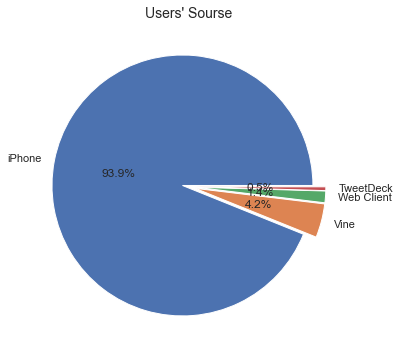

In [156]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = ['iPhone', 'Vine', 'Web Client', 'TweetDeck']
plt.pie(x=df.source.value_counts(), autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Users' Sourse", fontsize=14);

#### counts of the top ten most common dogs

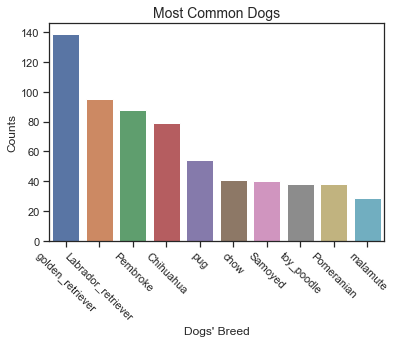

In [158]:
# Plot using Seaborn
# Bar Plot
sns.barplot(x=df.pred_1.value_counts().iloc[0:10].index, y=df.pred_1.value_counts().iloc[0:10])
plt.xlabel("Dogs' Breed")
plt.ylabel("Counts")
plt.title("Most Common Dogs", fontsize=14);
# Rotate x-labels
plt.xticks(rotation=-45);

#### Rating Distribution

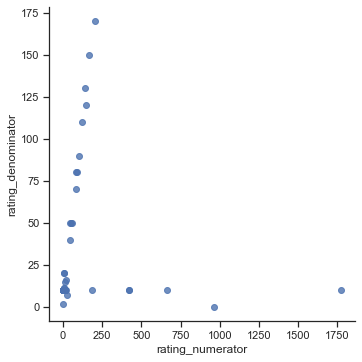

In [125]:

sns.lmplot(x='rating_numerator', y='rating_denominator', data=df, fit_reg=False);


In [206]:
df_twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

In [207]:
df_image_predictions_clean.to_csv('df_image_predictions_clean.csv', index=False)